In [83]:
import tensorflow
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score, ConfusionMatrixDisplay
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
# import tensorflow
import cv2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
import itertools


In [99]:
import tensorflow as tf
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.utils import image_dataset_from_directory

# Create datasets without ignore_errors first to access class_names
train_gen_temp = image_dataset_from_directory(
    r"C:\Users\Acer\OneDrive\Documents\Datasets\Fracture_dataset\dataset\train",
    image_size=(256, 256),
    batch_size=32,
    label_mode="categorical"
)

test_gen_temp = image_dataset_from_directory(
    r"C:\Users\Acer\OneDrive\Documents\Datasets\Fracture_dataset\dataset\valid",
    image_size=(256, 256),
    batch_size=32,
    label_mode="categorical"
)

# Class names (get BEFORE map and ignore_errors)
class_names = train_gen_temp.class_names
print(class_names)

# Apply ignore_errors
train_gen = train_gen_temp.ignore_errors()
test_gen = test_gen_temp.ignore_errors()

# Rescaling
rescale = Rescaling(1./255)

train_gen = train_gen.map(lambda x, y: (rescale(x), y))
test_gen  = test_gen.map(lambda x, y: (rescale(x), y))


Found 17607 files belonging to 8 classes.
Found 2000 files belonging to 8 classes.
['Non X-ray', 'XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']


In [85]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation="relu",padding="same",input_shape=(256,256,3)))
model.add(Conv2D(32,(3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(64,(3,3), activation="relu",padding="same"))
model.add(Conv2D(64,(3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(128,(3,3), activation="relu",padding="same"))
model.add(Conv2D(128,(3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(256,(3,3), activation="relu",padding="same"))
model.add(Conv2D(256,(3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(512,(3,3), activation="relu",padding="same"))
model.add(Conv2D(512,(3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(3,3))

model.add(Flatten())
model.add(Dense(1536,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(8,activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x0000027570B76FD0>>

In [86]:
import os
from PIL import Image

dataset_path = r"C:\Users\Acer\OneDrive\Documents\Datasets\Fracture_dataset\dataset\train\Non X-ray"

VALID_EXTS = ('.jpg', '.jpeg', '.png', '.bmp')

removed = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        file_path = os.path.join(root, file)

        # Remove non-image extensions
        if not file.lower().endswith(VALID_EXTS):
            removed.append(file_path)
            os.remove(file_path)
            continue

        # Validate image content
        try:
            with Image.open(file_path) as img:
                img.verify()
        except Exception:
            removed.append(file_path)
            os.remove(file_path)

print(f"✅ Removed {len(removed)} invalid files")



✅ Removed 0 invalid files


In [87]:
history=model.fit(train_gen,validation_data=test_gen,epochs=10)

Epoch 1/10
549/549 [==============================] - 555s 1s/step - loss: 1.4240 - accuracy: 0.4536 - val_loss: 1.2262 - val_accuracy: 0.5475
Epoch 2/10
549/549 [==============================] - 555s 1s/step - loss: 0.8904 - accuracy: 0.6863 - val_loss: 0.6367 - val_accuracy: 0.7895
Epoch 3/10
549/549 [==============================] - 545s 991ms/step - loss: 0.5657 - accuracy: 0.7990 - val_loss: 0.4955 - val_accuracy: 0.8375
Epoch 4/10
549/549 [==============================] - 543s 989ms/step - loss: 0.4086 - accuracy: 0.8586 - val_loss: 0.3675 - val_accuracy: 0.8775
Epoch 5/10
549/549 [==============================] - 540s 983ms/step - loss: 0.2985 - accuracy: 0.9005 - val_loss: 0.3107 - val_accuracy: 0.8975
Epoch 6/10
549/549 [==============================] - 538s 979ms/step - loss: 0.2414 - accuracy: 0.9196 - val_loss: 0.2743 - val_accuracy: 0.9125
Epoch 7/10
549/549 [==============================] - 539s 980ms/step - loss: 0.1871 - accuracy: 0.9406 - val_loss: 0.2707 - val_a

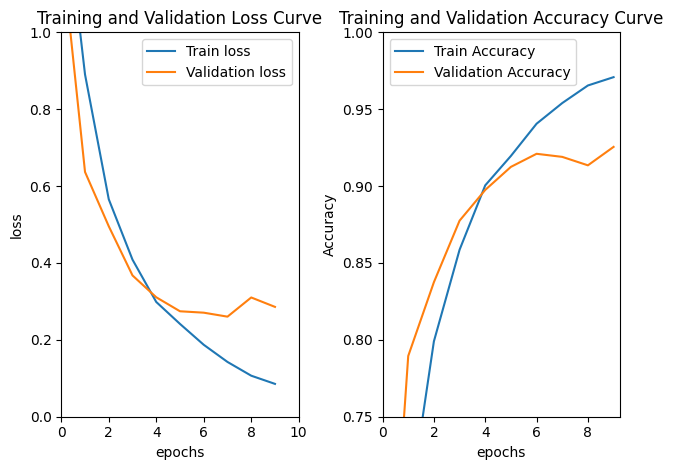

In [88]:
plt.subplot(1,2,1)
plt.title("Training and Validation Loss Curve")
plt.plot(history.history["loss"],label="Train loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()


plt.subplot(1,2,2)
plt.title("Training and Validation Accuracy Curve")
plt.plot(history.history["accuracy"],label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()


In [90]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(tf.argmax(y, axis=1).numpy())
    predictions.append(tf.argmax(model.predict(x),1).numpy())
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))
print(f"Train Accuracy  : {history.history['accuracy'][-1]*100} %")
print(f"Test Accuracy   : {accuracy_score(labels, predictions) * 100:.2f} %")
print(f"Precision Score : {precision_score(labels, predictions, average='micro') * 100:.2f} %")
print(f"Recall Score    : {recall_score(labels, predictions, average='micro') * 100:.2f} %")

1/1 [==============================] - 0s 141ms/step
Train Accuracy  : 97.08494544029236 %
Test Accuracy   : 92.55 %
Precision Score : 92.55 %
Recall Score    : 92.55 %


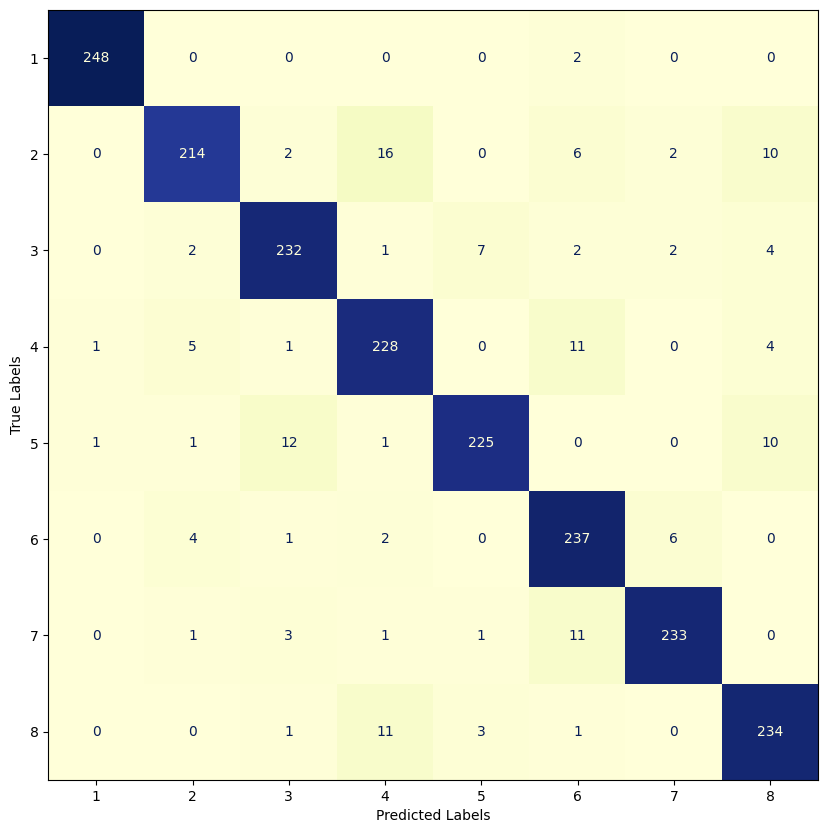

In [92]:
cm=confusion_matrix(labels,predictions)
display=ConfusionMatrixDisplay(cm,display_labels=list(range(1,9)))
fig,ax=plt.subplots(figsize=(15,10))
display.plot(ax=ax, colorbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [104]:
model.save("Fracture_Detection_Model.h5")

In [105]:
class_names


['XR_ELBOW',
 'XR_FINGER',
 'XR_FOREARM',
 'XR_HAND',
 'XR_HUMERUS',
 'XR_SHOULDER',
 'XR_WRIST']

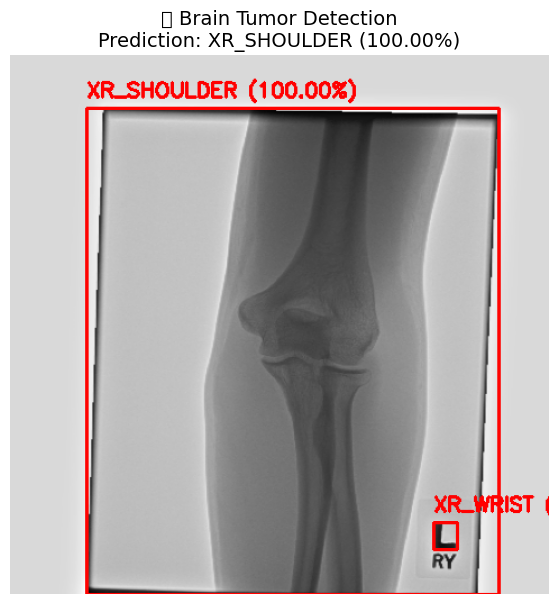

🧩 Predicted Tumor Type: XR_SHOULDER
📊 Confidence: 100.00%


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

model = load_model("Fracture_Detection_Model.h5")

# ✅ Define class names
class_names = ['Non X-ray', 'XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']

img_path = r"c:\Users\Acer\OneDrive\Documents\Datasets\Fracture_dataset\dataset\train\XR_ELBOW\0.png"
orig_frame = cv2.imread(img_path)
orig_frame = cv2.resize(orig_frame, (480, 480))

# Convert for contour detection
gray = cv2.cvtColor(orig_frame, cv2.COLOR_BGR2GRAY)

_,thress=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contour,_=cv2.findContours(thress,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

detected_label=None
detected_conf=0
for cnt in contour:
    x,y,w,h=cv2.boundingRect(cnt)
    if w*h<500:
        continue
    roi_img=gray[y:y+h,x:x+w]
    resized_roi=cv2.resize(roi_img,(256,256))
    roi_array=img_to_array(resized_roi)
    # If ROI is grayscale
    roi_img = cv2.cvtColor(roi_array, cv2.COLOR_GRAY2RGB)

    roi_array=preprocess_input(roi_img)
    roi_array=np.expand_dims(roi_array,axis=0)

    prediction=model.predict(roi_array,verbose=0)
    class_id=np.argmax(prediction)
    class_labels=class_names[class_id]
    confidence=prediction[0][class_id]*100

    cv2.rectangle(orig_frame, (x, y), (x+w, y+h), (0, 2, 255), 2)
    cv2.putText(
        orig_frame,
        f"{class_labels} ({confidence:.2f}%)",
        (x, y-10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (0, 0, 255),
        2
    )
    
    detected_label = class_labels
    detected_conf = confidence

if detected_label is None:
    roi_img=cv2.resize(roi_img,(256,256))
    img_array=img_to_array(roi_img)
    img_array=preprocess_input(img_array)
    img_array=np.expand_dims(img_array)
    
    prediction=model.predict(img_array,verbose=0)
    class_id=np.argmax(prediction)
    detected_conf=class_names[class_id]
    detected_conf=prediction[0][class_id]*100

plt.figure(figsize=(7, 7))
plt.imshow(cv2.cvtColor(orig_frame, cv2.COLOR_BGR2RGB))
plt.title(f"🧠 Brain Tumor Detection\nPrediction: {detected_label} ({detected_conf:.2f}%)", fontsize=14)
plt.axis("off")
plt.show()

# ✅ Print result in console too
print(f"🧩 Predicted Tumor Type: {detected_label}")
print(f"📊 Confidence: {detected_conf:.2f}%")

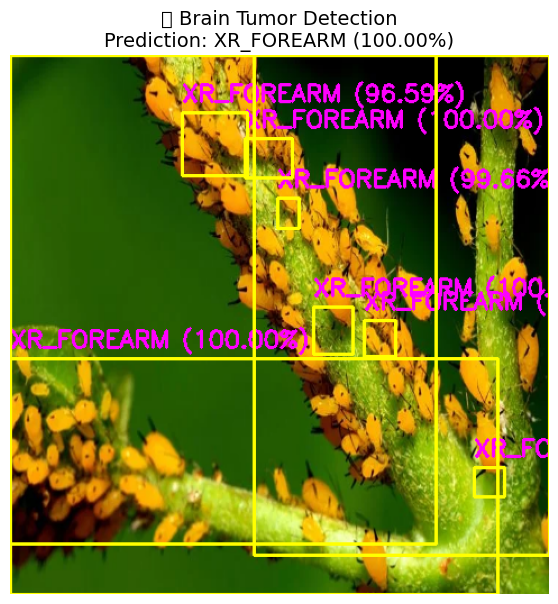

🧩 Predicted Tumor Type: XR_FOREARM
📊 Confidence: 100.00%


In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# ✅ Load trained model
model = load_model("Fracture_Detection_Model.h5")

# ✅ Define class names
class_names = ['Non X-ray', 'XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']




# ✅ Load and preprocess MRI image
img_path = r"C:\Users\Acer\OneDrive\Pictures\aphids1.webp"
frame = cv2.imread(img_path)

if frame is None:
    raise FileNotFoundError("❌ Image not found. Check path!")

frame = cv2.resize(frame, (480, 480))
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# ✅ Apply proper threshold for contour detection
_, thress = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# ✅ Find contours

contours, _ = cv2.findContours(thress, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

detected_label = None
detected_conf = 0

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w * h < 500:  # Ignore small artifacts
        continue

    roi = frame[y:y + h, x:x + w]
    resized_roi = cv2.resize(roi, (256, 256))
    roi_array = img_to_array(resized_roi)
    roi_array = preprocess_input(roi_array)  # ✅ MobileNet normalization
    roi_array = np.expand_dims(roi_array, axis=0)

    # ✅ Predict tumor type
    prediction = model.predict(roi_array, verbose=0)
    class_id = np.argmax(prediction)
    class_label = class_names[class_id]
    confidence = prediction[0][class_id] * 100

    detected_label = class_label
    detected_conf = confidence

    # ✅ Draw bounding box + label on the frame
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)
    cv2.putText(frame, f"{class_label} ({confidence:.2f}%)", (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 255), 2)

# ✅ If no contour was detected (like "No Tumor" images)
if detected_label is None:
    # Predict directly on whole image
    img_resized = cv2.resize(frame, (256, 256))
    img_array = img_to_array(img_resized)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array, verbose=0)
    class_id = np.argmax(prediction)
    detected_label = class_names[class_id]
    detected_conf = prediction[0][class_id] * 100

# ✅ Display image with prediction
plt.figure(figsize=(7, 7))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title(f"🧠 Brain Tumor Detection\nPrediction: {detected_label} ({detected_conf:.2f}%)", fontsize=14)
plt.axis("off")
plt.show()

# ✅ Print result in console too
print(f"🧩 Predicted Tumor Type: {detected_label}")
print(f"📊 Confidence: {detected_conf:.2f}%")


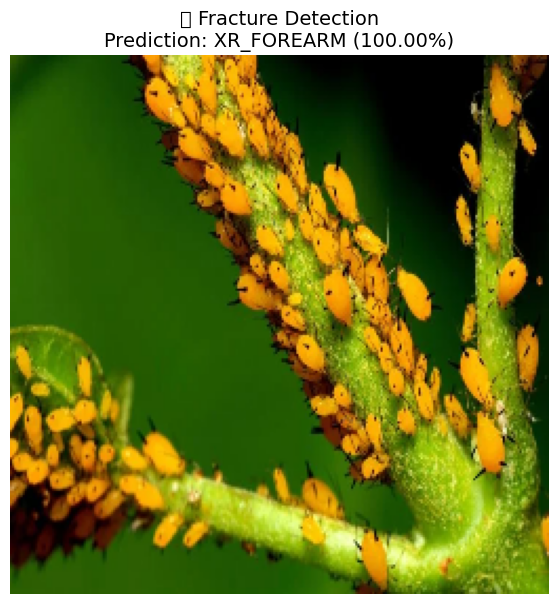

🦴 Predicted X-Ray Type: XR_FOREARM
📊 Confidence: 100.00%


In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load model
model = load_model("Fracture_Detection_Model.h5")

# Class names
class_names = ['Non X-ray', 'XR_ELBOW', 'XR_FINGER', 'XR_FOREARM',
            'XR_HAND', 'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']


CONFIDENCE_THRESHOLD = 95.0

# Load image
img_path = r"C:\Users\Acer\OneDrive\Pictures\aphids1.webp"
image = cv2.imread(img_path)
image = cv2.resize(image, (256, 256))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Preprocess
img_array = img_to_array(image_rgb)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array, verbose=0)
class_id = np.argmax(prediction)
confidence = prediction[0][class_id] * 100

detected_label = None
detected_conf = confidence

if confidence >= CONFIDENCE_THRESHOLD:
    detected_label = class_names[class_id]

# Display
plt.figure(figsize=(7, 7))
plt.imshow(image_rgb)

if detected_label:
    plt.title(
        f"🦴 Fracture Detection\nPrediction: {detected_label} ({detected_conf:.2f}%)",
        fontsize=14
    )
else:
    plt.title(
        "⚠️ Unable to make a confident prediction\n(Confidence below 95%)",
        fontsize=14
    )

plt.axis("off")
plt.show()

# Console output
if detected_label:
    print(f"🦴 Predicted X-Ray Type: {detected_label}")
    print(f"📊 Confidence: {detected_conf:.2f}%")
else:
    print("⚠️ Prediction rejected due to low confidence")
    print(f"📊 Highest confidence: {detected_conf:.2f}%")


In [ ]:
import os

dataset_path = r"C:\Users\Acer\OneDrive\Documents\Datasets\Fracture_dataset\dataset\valid"
total_images = 0

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        images = [
            img for img in os.listdir(class_path)
            if img.lower().endswith(('.png', '.jpg', '.jpeg'))
        ]
        count = len(images)
        total_images += count

        print(f"{class_name}: {count} images")

print("-" * 40)
print(f"Total images: {total_images}")


Non X-ray: 250 images
XR_ELBOW: 250 images
XR_FINGER: 250 images
XR_FOREARM: 250 images
XR_HAND: 250 images
XR_HUMERUS: 250 images
XR_SHOULDER: 250 images
XR_WRIST: 250 images
----------------------------------------
Total images: 2000


In [110]:
import tensorflow as tf
import tf2onnx

model = tf.keras.models.load_model("Fracture_Detection_Model.h5")

spec = (tf.TensorSpec((1, 256, 256, 3), tf.float32, name="input"),)

output_path = "model.onnx"
model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13, output_path=output_path)

print("Conversion complete! Saved as model.onnx")

Conversion complete! Saved as model.onnx
